# Step 1: Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Data

In [22]:
df = pd.read_csv("../data/processed/clean_telco.csv")
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,29.85,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,56.95,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,53.85,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,42.30,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,70.70,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Step 3: Select Features and Target - choose the input variables X and the output variable y

In [23]:
selected_features = [
    'tenure', 'TotalCharges',
    'Contract_One year', 'Contract_Two year',
    'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Electronic check', 'SeniorCitizen'
]
X = df[selected_features]
y = df['MonthlyCharges']

# Step 4.0: Train/Test Split - split data into training and testing sets to evaluate generalization.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4.1: Verify Train/Test Split

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("Train sample (X):", X_train.head(1).values)
print("Train sample (y):", y_train.head(1).values)

X_train shape: (5625, 8)
X_test shape: (1407, 8)
y_train shape: (5625,)
y_test shape: (1407,)
Train sample (X): [[0.4309983366751445 -0.0913701185161795 False False False False False 0]]
Train sample (y): [49.05]


#  Step 5.0: Train the Polynomial Model - fit a pipeline that transforms features into polynomials and trains a model.

In [26]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

# Step 5.1: Verify Model Training

In [27]:
# Check model steps and coefficients
print("Pipeline steps:", model.named_steps)

# Access linear regression coefficients
lin_reg = model.named_steps['linearregression']
poly = model.named_steps['polynomialfeatures']

print("Number of coefficients (incl. bias):", len(lin_reg.coef_))
print("Intercept (θ₀):", lin_reg.intercept_)
print("Coefficients (θ₁…θₙ):", lin_reg.coef_)

# Show actual feature names
print("Polynomial feature names:", poly.get_feature_names_out())

Pipeline steps: {'polynomialfeatures': PolynomialFeatures(degree=3), 'linearregression': LinearRegression()}
Number of coefficients (incl. bias): 165
Intercept (θ₀): 74.73914542304638
Coefficients (θ₁…θₙ): [-1.71569584e-13 -6.01145136e+01  8.39041139e+01 -9.25819984e-01
 -7.72821651e-01 -1.81451476e+00 -3.17594544e+00 -2.55761752e-01
  7.50636547e-03  2.50264466e+01 -4.41300908e+01  3.66530332e+00
  2.25121550e+00 -1.65251258e-02  1.80177152e+01  7.12681056e-01
  1.51021462e+00 -1.47500016e+00 -5.26966264e+00 -3.44799563e+00
 -4.62253162e+00 -9.84323982e+00 -5.62770765e-01 -8.06479475e-01
 -9.25819984e-01  4.11226608e-13  4.68747963e-02 -1.89451179e+00
  4.26817582e-01  3.88545849e-01 -7.72821651e-01 -1.43288549e-02
 -1.51516826e+00 -1.97390922e-01 -1.17398924e+00 -1.81451476e+00
 -3.19744231e-14  3.12375824e-01  1.43526056e-01 -3.17594544e+00
  1.04465762e+00 -7.66694566e-01 -2.55761752e-01 -1.41320847e-01
  7.50636547e-03  7.53774730e-01 -9.91612429e+00 -3.25614185e+00
 -3.48445563e+

# Step 6.0: Predict and Visualize - See how well the model fits the data by plotting predictions

ValueError: x and y must be the same size

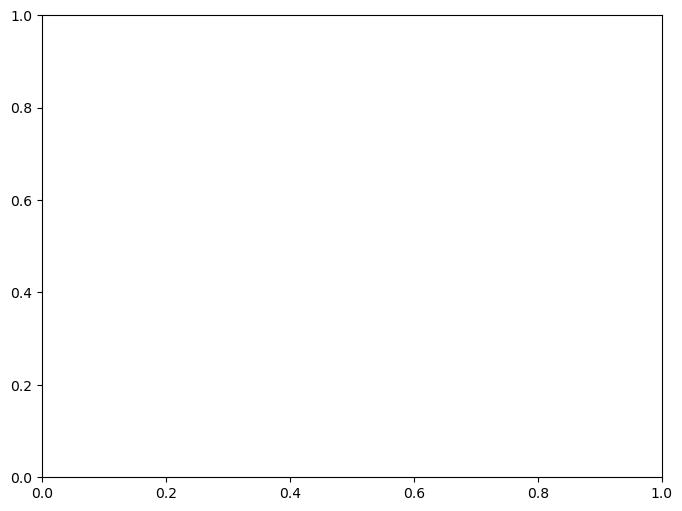

In [28]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Step 6.1: Verify Predictions and Plot

Predicted values: [ 25.14977058  22.31476498 100.31953041  56.04333745  39.68592996]
Actual values:    [ 25.    24.7  102.25  55.05  29.45]


ValueError: x and y must be the same size

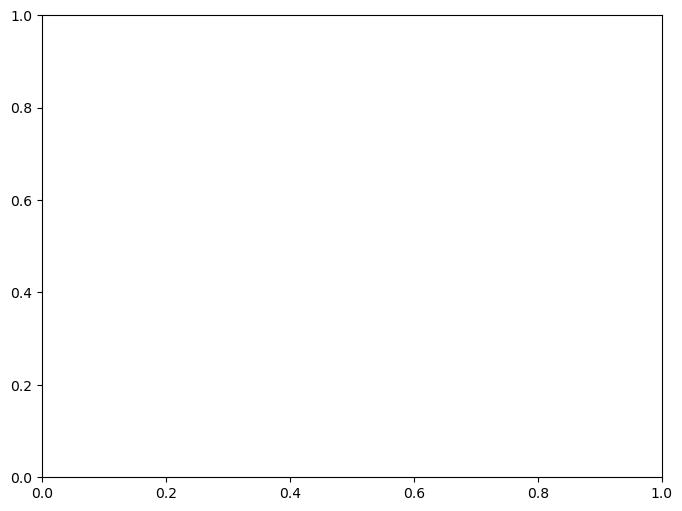

In [29]:
# Predict and print a sample
y_pred = model.predict(X_test)
print("Predicted values:", y_pred[:5])
print("Actual values:   ", y_test.iloc[:5].values)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Polynomial Regression: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Evaluate the Model - Quantify how well the model is doing.

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 20.746573496456968
R² Score: 0.9765249926496627
